# Partielle DGL

In [1]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy.integrate

In [106]:
nx = 100
nt = 10000
x = np.linspace(0, 10, nx)
t = np.linspace(0, 10, nt)
dx = 10 / nx
dt = 10 / nt

In [107]:
d = np.zeros((nt, nx))

In [114]:
u = np.zeros(nx)
# u = np.exp(-(x-5)**2/0.5)

In [115]:
a = 500
d[0] = u
for it in range(1, nt):
    u[0] = 1
    u[-1] = 0
    up = np.copy(u)
    up[1:-1] = u[:-2] - 2*u[1:-1] + u[2:]
    up[0] = u[0] - 2*u[1] + u[2]
    up[-1] = u[-3] - 2*u[-2] + u[-1]
    up *= dt * a
    up += u
    d[it] = up
    u = np.copy(up)

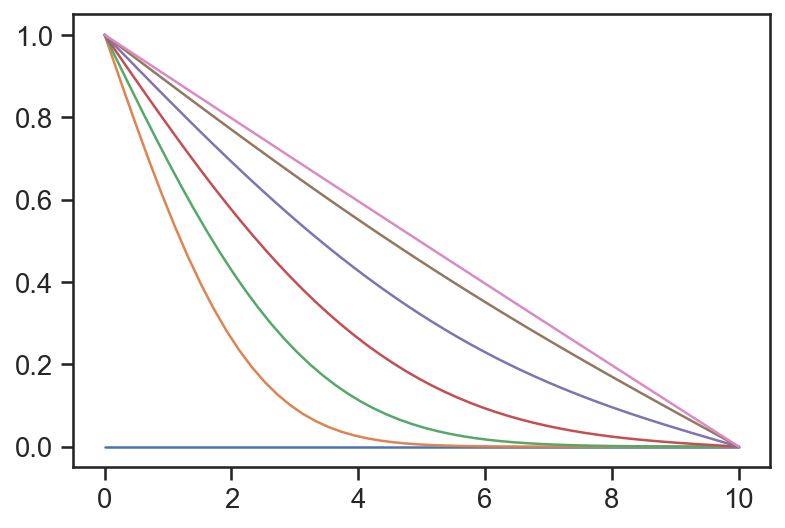

In [121]:
plt.plot(x, d[0])
plt.plot(x, d[nt//32])
plt.plot(x, d[nt//16])
plt.plot(x, d[nt//8])
plt.plot(x, d[nt//4])
plt.plot(x, d[nt//2])
plt.plot(x, d[-1])

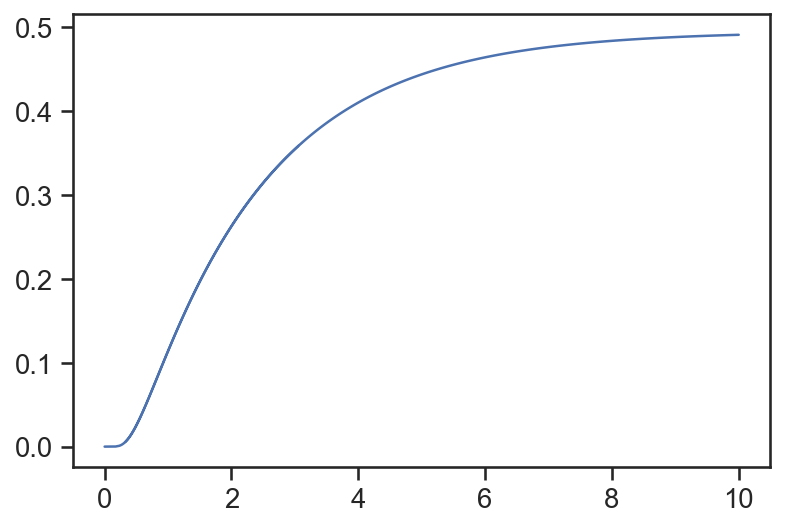

In [118]:
plt.plot(t, d[:,nx//2])

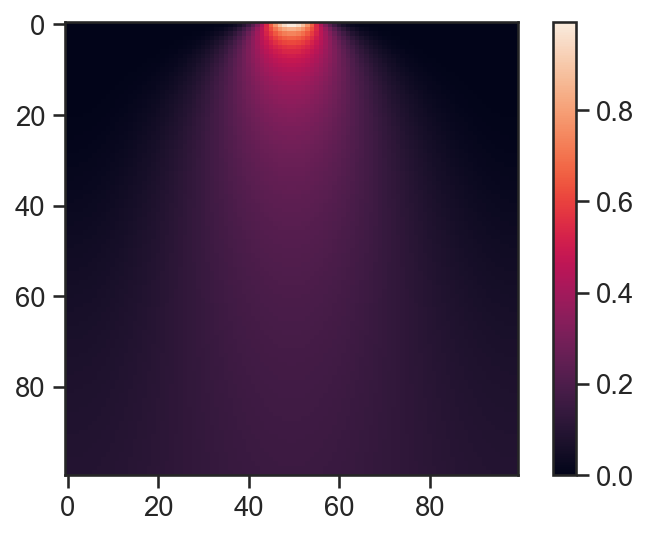

In [60]:
plt.imshow(d[::100])
plt.colorbar()